In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("BankFAQs.csv")
data[:5]

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts


In [5]:
data.shape

(1773, 3)

In [6]:
data.describe()

,Question,Answer,Class
count,1773,1773,1773
unique,1343,1446,7
top,How can I change the mode of repayment/ accoun...,Post Dated Cheques(PDCs)/Security Cheques subm...,insurance
freq,18,17,469


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1773 non-null   object
 1   Answer    1773 non-null   object
 2   Class     1773 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB


In [8]:
data.isnull().sum() # no null values present in the datset

Question    0
Answer      0
Class       0
dtype: int64

In [9]:
set(data.Class) # shows the values of categories present in the Class

{'accounts',
 'cards',
 'fundstransfer',
 'insurance',
 'investments',
 'loans',
 'security'}

In [10]:
# creation of new dataset
df1 = pd.read_csv("New Bank Faq data.csv", encoding = 'cp1252')
df1[:5]

,Question,Answer,Class
0,What is net banking ?,Facility offered by the bank that allows custo...,banking mode
1,How do i register for netbanking ?,Please download and fill up the netbanking req...,banking mode
2,what are the features of netbanking ?what serv...,"Check the account statement online,Open a fixe...",banking mode
3,I am getting error in netbanking,Please contact our customer care executive or ...,banking mode
4,What is mobile banking?,Mobile banking is a service provided by our ba...,banking mode


In [11]:
df1.shape   

(35, 3)

In [12]:
# concating/merging of 2 dataset 
df2 = pd.concat([data,df1], ignore_index = True)
df2[:5]

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts


In [13]:
df2.shape # new shape of dataset after merging both dataset

(1808, 3)

In [14]:
#Exploratory Data Analysis
# Before applying visualization, we will first analyse the dataset after merging 2 dataset.

In [15]:
df2.describe()

,Question,Answer,Class
count,1808,1808,1808
unique,1378,1480,9
top,How can I change the mode of repayment/ accoun...,Post Dated Cheques(PDCs)/Security Cheques subm...,insurance
freq,18,17,469


In [16]:
df2.info() # no null values present in the new dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1808 non-null   object
 1   Answer    1808 non-null   object
 2   Class     1808 non-null   object
dtypes: object(3)
memory usage: 42.5+ KB


In [17]:
nunique = df2.nunique()
nunique

Question    1378
Answer      1480
Class          9
dtype: int64

In [18]:
set(df2.Class) # after merging 2 dataset we have now 9 classes in our dataset.

{'accounts',
 'banking mode',
 'cards',
 'fundstransfer',
 'general banking',
 'insurance',
 'investments',
 'loans',
 'security'}

In [19]:
# to check the maximum counts present in which class
counts = df2['Class'].value_counts()
counts

insurance          469
cards              403
loans              381
accounts           321
investments        147
security            61
fundstransfer       14
banking mode         8
general banking      4
Name: Class, dtype: int64

Let us visually analyze the data and check how many questions and answers pertains to which class?

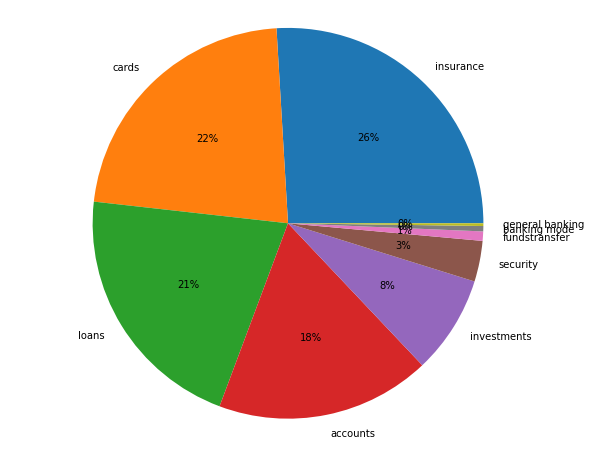

In [20]:
plt.figure(figsize = (10,8))
plt.pie(counts.values,labels = counts.index,autopct='%1.0f%%')
plt.axis('equal')
plt.show()

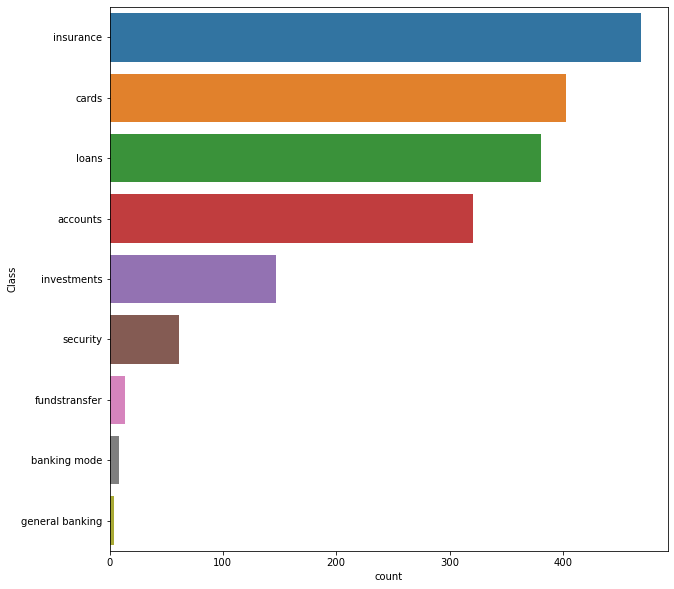

In [21]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Class', data=df2, order = counts.index)
plt.show()

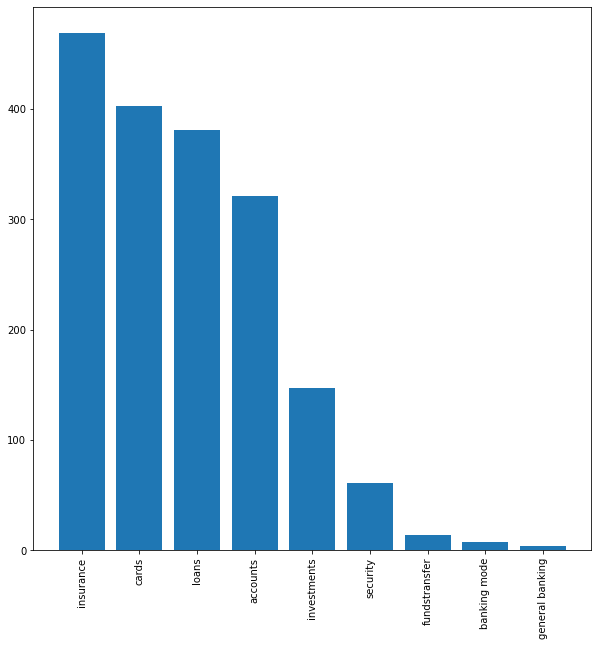

In [22]:
plt.figure(figsize = (10,10))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [23]:
# Importing necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

In [24]:
df2[:5]

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts


# Cleaning the data

In [25]:
# removing duplicate rows
duplicates = df2[df2.duplicated()]
duplicates # there are 274 duplicate rows in the dataset

,Question,Answer,Class
19,Can I access my account by telephone to conduc...,Yes you can. You can use PhoneBanking to perfo...,accounts
21,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
25,Can I access my account by telephone to conduc...,Yes you can. You can use PhoneBanking to perfo...,accounts
27,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
33,Can I access my account from any M&N Bank branch,Yes. All M&N Bank branches and systems are in...,accounts
...,...,...,...
1702,How can I get my address changed in my loan ac...,In order to change your address in our records...,loans
1703,How do I obtain a NOC from the bank for fittin...,You may obtain the NOC for fitting an LPG/CNG ...,loans
1704,How can I change the mode of repayment/ accoun...,In the event that you wish to change the mode ...,loans
1705,How do I obtain a Duplicate Repayment Schedule...,You may obtain a Duplicate Repayment Schedule ...,loans


In [26]:
# dropping all duplicate rows
df2.drop_duplicates(inplace = True)

In [27]:
df2.shape # new dataframe shape after removing all duplicate rows.

(1534, 3)

In [28]:
# Applying label encoder in class column
le = preprocessing.LabelEncoder()
le.fit(['Class'])
df2['Class'] = le.fit_transform(df2['Class'])
df2['Class']

0       0
1       0
2       0
3       0
4       0
       ..
1803    0
1804    8
1805    8
1806    8
1807    8
Name: Class, Length: 1534, dtype: int32

In [29]:
set(df2.Class) # no of categories/classes present in Class Column

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [30]:
stop_words = set(stopwords.words('english'))
#print(stop_words)

In [31]:
def data_processing(text):
    text = text.lower() # lower case conversion
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text) # removal of punctuation
    text = re.sub("\[.*?\]'\w+", '',text) # removal of ticks and next character 
    text = re.sub(r'\w*\d+\w*', '', text) # removal of numbers
    text = re.sub('\n', '', text)# removal of special characters
    text = text.encode('ascii','ignore').decode() # removal of unicode characters
    text_tokens = word_tokenize(text) # tokenizing the text
    filtered_text = [w for w in text_tokens if not w in stop_words] # removing stop words
    return " ". join(filtered_text) # returning the process text data.

In [32]:
# applying the changes in the dataframe.
df2['Question'] = df2['Question'].apply(data_processing)

In [33]:
# Applying Lemmatization
lemm = WordNetLemmatizer()
def lemmatize(data):
    text = [lemm.lemmatize(word) for word in data]
    return data

In [34]:
df2['Question'] = df2['Question'].apply(lambda x: lemmatize(x))

In [35]:
df2.head() # after implementing the changes.

,Question,Answer,Class
0,documents required opening current account sol...,Following documents are required to open a Cur...,0
1,transfer current account one branch another,"Yes, Current Accounts can be transferred from ...",0
2,present status nri extra documents required op...,NRI/PIO can open the proprietorship/partnershi...,0
3,documents required opening current account lim...,Following documents are required for opening a...,0
4,documents required change address entity,Following documents are required to change the...,0


# Applying train test split

In [36]:
X = df2['Question'].values# Creating Independent variable and converting into array
X[:2]

array(['documents required opening current account sole proprietorship firm',
       'transfer current account one branch another'], dtype=object)

In [37]:
Y = df2['Class'].values # creating Dependent variable and converting into array
Y[:2]

array([0, 0])

In [38]:
# Applying TFID Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectors = vectorizer.fit_transform(X)

In [39]:
X_vectors.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
df_vec=pd.DataFrame(X_vectors.todense(),columns=vectorizer.get_feature_names())
df_vec

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aadhaar,able,abroad,accept,accepted,access,accessories,accident,accidental,account,...,working,world,would,write,writing,year,yearly,years,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#applying train test split
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X_vectors,Y,test_size= 0.20,random_state = 51)
print("Train set : " , X_train.shape, Y_train.shape)
print("Test set: ", X_test.shape,  Y_test.shape)

Train set :  (1227, 1317) (1227,)
Test set:  (307, 1317) (307,)


In [42]:
#applying SVC
from sklearn import svm
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)
y_pred1 = classifier.predict(X_test)
from sklearn.metrics import f1_score, precision_score, recall_score
print("Accuracy : ", f1_score(Y_test,y_pred1, average = 'weighted')*100)
print("Precision : ", precision_score(Y_test,y_pred1, average = 'weighted')*100)
print("Recall : ", recall_score(Y_test,y_pred1, average = 'weighted')*100)

Accuracy :  89.68106685353617
Precision :  90.97501343972661
Recall :  89.90228013029315


In [43]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [45]:
import pickle
pickle.dump(question_vectors,open('Question_vectors.pkl','wb'))
pickle.dump(vectorizer,open('Vectorizer1.pkl','wb'))

NameError: name 'question_vectors' is not defined

In [ ]:
#model = pickle.load(open("model1.pkl","rb"))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_question = "How to change debit card pin?"
vectorizer = TfidfVectorizer()
## Create a TF-IDF vectorizer to convert the text data and query to a vector representation
vectorizer.fit_transform(df2['Answer'].values.tolist() + [user_question])
# Get the vector representation of the question and answer
question_vectors = vectorizer.transform(df2['Answer']).toarray()
test_vector = vectorizer.transform([user_question]).toarray()
# Calculate the cosine similarity between both vectors
cosine_sims = cosine_similarity(answer_vectors, test_vector)
# Get the index of the most similar text to the query
most_similar_idx = np.argmax(cosine_sims)
# Print the most similar text as the answer to the query
print(df2.iloc[most_similar_idx]['Answer'])